<a href="https://colab.research.google.com/github/gsahai1x/AIML/blob/master/Image_Classification_using_CNN_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  GitHub URL: https://github.com/gsahai1x/AIML

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
# from yellowbrick.classifier import ClassificationReport, ROCAUC
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))
from sklearn import set_config
set_config(print_changed_only=False)
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,StratifiedKFold
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Dense,Conv1D,Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, GlobalMaxPooling2D, InputLayer, MaxPool2D, GlobalMaxPool2D
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras import optimizers
from google.colab.patches import cv2_imshow      # To show images using cv2 module
import cv2

2.4.1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Dataset



1.   Use numpy function to load image dataset stored in my google drive. 
2.   The label is a csv file stored  in my google drive.


 

In [4]:
X_train = np.load('/content/drive/MyDrive/images.npy')

In [5]:
# Set the path to the dataset folder. (The dataset contains three image folders: "predict", "test", and "train")
y_train = pd.read_csv('/content/drive/MyDrive/Labels.csv')

### Print Shape of Data

In [6]:
X_train.shape

(4750, 128, 128, 3)



1.   There are 4750 colored images of size 128*128



In [7]:
y_train.shape

(4750, 1)

1.   There are 4750 labels equal to the the number of images. 



In [8]:
y_train['Label'][0]

'Small-flowered Cranesbill'

### Visualize Image Data



1.   Visualize Data first few images using image grid.



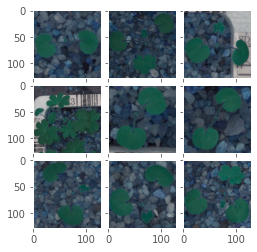

In [9]:
#Import ImageGrid
from mpl_toolkits.axes_grid1 import ImageGrid
count = 0
fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for ax,i in zip(grid,X_train):
  # print(y_train['Label'][count])
  ax.imshow(i)
  ax.grid(None)
  count = count + 1
  if count == 9:
    break



1.   Images look to be clear



#### Visualize Labels

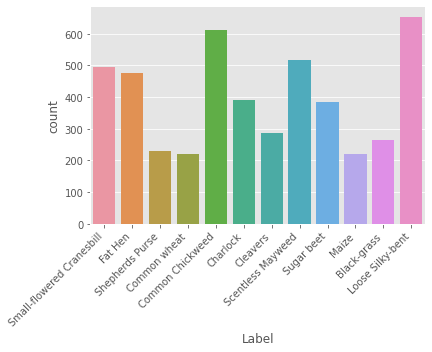

In [10]:
ax = sns.countplot(y_train['Label'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

Most Loose Silky-bent, Least common wheat/Maize

## Data Preprocessing

### Gaussian Blurring



1.   Gaussian Blurring needs to be applied only on images. Loop over and apply gaussian blurring. 



In [11]:
X_train1 = []
for i in X_train:
  X_train1.append(cv2.GaussianBlur(i, (5, 5), 0))

#### Convert to numpy array

In [12]:
X_train2 = np.array(X_train1)

In [13]:
X_train2.shape

(4750, 128, 128, 3)

#### Print Original and Gaussian Image. 1 example

Original Image:



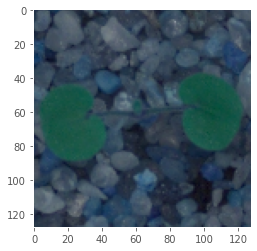


 Output after gaussian blurring: 



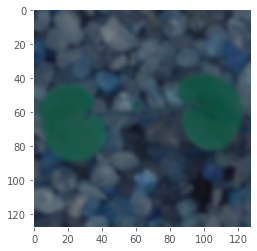

In [14]:
#Print Original and Gaussian Image
print('Original Image:\n')
plt.imshow(X_train[0])
plt.grid(None)
plt.show()
print('\n Output after gaussian blurring: \n')
plt.imshow(X_train2[0])
plt.grid(None)
plt.show()

### Normalization

In [15]:
X_train2 = X_train2.astype('float32')
X_train2 /= 255

In [16]:
print("X_train2 shape:", X_train2.shape)
print("Images in X_train2:", X_train2.shape[0])
print("Max value in X_train2:", X_train2.max())
print("Min value in X_train2:", X_train2.min())

X_train2 shape: (4750, 128, 128, 3)
Images in X_train2: 4750
Max value in X_train2: 1.0
Min value in X_train2: 0.0


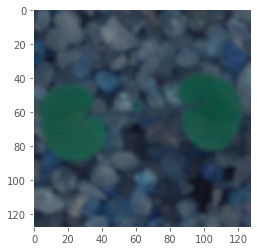

In [17]:
# image0 = cv2.imread(X_train[0])
plt.imshow(X_train2[0])
plt.grid(None)

### Visualize Data after Preprocessing

#### Array Visualization

In [18]:
print(X_train2[0])

[[[0.14117648 0.2        0.2901961 ]
  [0.15294118 0.21176471 0.29803923]
  [0.1882353  0.24705882 0.3254902 ]
  ...
  [0.30588236 0.36862746 0.43137255]
  [0.30588236 0.3647059  0.42745098]
  [0.30588236 0.3647059  0.42745098]]

 [[0.14509805 0.20392157 0.2901961 ]
  [0.16078432 0.21960784 0.3019608 ]
  [0.2        0.2627451  0.3372549 ]
  ...
  [0.30980393 0.36862746 0.43137255]
  [0.30980393 0.36862746 0.42745098]
  [0.30980393 0.3647059  0.42352942]]

 [[0.14901961 0.21176471 0.29411766]
  [0.17254902 0.23529412 0.30980393]
  [0.22352941 0.28627452 0.35686275]
  ...
  [0.30980393 0.3647059  0.42352942]
  [0.30980393 0.36862746 0.42352942]
  [0.30980393 0.36862746 0.42352942]]

 ...

 [[0.15294118 0.21176471 0.2784314 ]
  [0.15686275 0.21568628 0.28235295]
  [0.16470589 0.21960784 0.28627452]
  ...
  [0.21568628 0.28235295 0.3529412 ]
  [0.23921569 0.3019608  0.36862746]
  [0.24705882 0.30588236 0.37254903]]

 [[0.16078432 0.21960784 0.28235295]
  [0.16470589 0.22352941 0.28627452]


All values in matrix are between 0 and 1

#### Gaussian Image Visualization after normalization

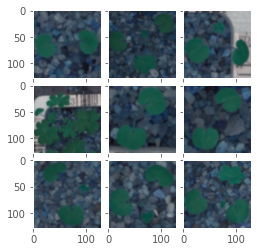

In [19]:
count = 0
fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for ax,i in zip(grid,X_train2):
  # print(y_train['Label'][count])
  ax.imshow(i)
  ax.grid(None)
  count = count + 1
  if count == 9:
    break

## Make Data Compatible

### One Hot Encoding

In [20]:
#Use scikit learn label binarizer
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)

In [21]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [22]:
y_train.shape

(4750, 12)

### Split Data into Training/Testing/Validation

In [23]:
X_train2.shape

(4750, 128, 128, 3)

In [24]:
y_train.shape

(4750, 12)

#### Split data in 70% Train, 15% Validation, 15% Test

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_train2, y_train, test_size = 0.3, random_state=42)
x_val, x_test1, y_val, y_test1 = train_test_split(x_test, y_test, test_size = 0.5, random_state=42)

#### Print shape of train, validation, and test

In [26]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test1.shape, y_test1.shape)

(3325, 128, 128, 3) (3325, 12) (712, 128, 128, 3) (712, 12) (713, 128, 128, 3) (713, 12)


The shape is compatible with Keras. No reshaping required. 

## Build Model

In [27]:
def new_model():
  model =  Sequential()

  # Input layer
  model.add(InputLayer(input_shape=(x_train.shape[1:])))

  # Here we add a 2D Convolution layer
  model.add( Conv2D(64, kernel_size=(3,3), activation='relu'))

  # Max Pool layer 
  model.add( MaxPool2D(pool_size = (2,2)))

  # Normalization layer
  model.add( BatchNormalization())

  # 2D Convolution layer
  model.add( Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))

  # Max Pool layer 
  model.add( MaxPool2D(pool_size = (2,2)))

  # Normalization layer
  model.add( BatchNormalization())

  # 2D Convolution layer
  model.add( Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

  # Max Pool layer 
  model.add( MaxPool2D(pool_size = (2,2)))

  # Normalization layer
  model.add( BatchNormalization())

  # 2D Convolution layer
  model.add( Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

  # Max Pool layer 
  model.add( MaxPool2D(pool_size = (2,2)))

  # Global Max Pool layer
  model.add( GlobalMaxPool2D())

  # Dense Layers after flattening the data
  model.add( Flatten())

  model.add( Dense(128, activation='relu'))

  # Dropout
  model.add( Dropout(0.2))
  model.add( Dense(64, activation='relu'))

  # Normalization layer
  model.add( BatchNormalization())

  #Add Output Layer
  model.add( Dense(12, activation='softmax')) # = 12 predicted classes
  return model
model = new_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

In [28]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

#### Compile Model using categorical crossentropy

In [29]:

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#### Tried early stopping, but its stopping before getting to a better accuracy. I can increase patience, but choose to run all epochs. 

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('weed_species.h5',
                                    monitor='val_loss',
                                    verbose=1,
                                    save_best_only=True,
                                    save_weights_only=True,
                                    mode='auto',
                                    period=1)

#### Fit Model


1.   Tried with batch size 32, 100. If the batch size increases it starts taking too much time even with GPU processing. 
2.   Tried with epochs 10, 30, 40, 120, 150. There are too many modulations. Some epochs have very good validation accuracy but some have very low accuracy and then it increases again. So we will use the model checkpoint to minimize the loss function. 
3.   Tried with learning rate 0.01 and 0.001. 0.0001 learning rate with higher epochs seem to be giving better results.







Epoch 1/150
104/104 [==============================] - 7s 35ms/step - loss: 2.4147 - accuracy: 0.2342 - val_loss: 3.2442 - val_accuracy: 0.1419

Epoch 00001: val_loss improved from inf to 3.24416, saving model to weed_species.h5
Epoch 2/150
104/104 [==============================] - 3s 27ms/step - loss: 1.4131 - accuracy: 0.5216 - val_loss: 4.1699 - val_accuracy: 0.1404

Epoch 00002: val_loss did not improve from 3.24416
Epoch 3/150
104/104 [==============================] - 3s 26ms/step - loss: 1.0414 - accuracy: 0.6638 - val_loss: 5.6524 - val_accuracy: 0.1419

Epoch 00003: val_loss did not improve from 3.24416
Epoch 4/150
104/104 [==============================] - 3s 27ms/step - loss: 0.8285 - accuracy: 0.7284 - val_loss: 5.5124 - val_accuracy: 0.1433

Epoch 00004: val_loss did not improve from 3.24416
Epoch 5/150
104/104 [==============================] - 3s 27ms/step - loss: 0.6504 - accuracy: 0.7795 - val_loss: 2.4502 - val_accuracy: 0.2767

Epoch 00005: val_loss improved from 3.

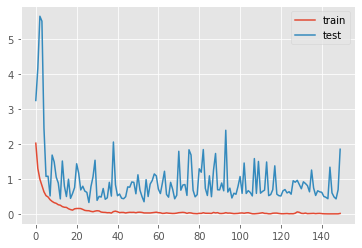

In [31]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=150,
                    validation_data=(x_val, y_val),
                    shuffle=True,
                    verbose=1,
                    callbacks=[model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

The validation model has a lot of modulations. Will try with more epochs to see if the loss goes lower. 

#### Convert X_test2 and y_test2 to numpy array. Keras take data in image format. pixel by pixel by color

In [32]:
x_test2 = np.array(x_test1)
y_test2 = np.array(y_test1)

#### Score the trained model
##### Get results om the trained model. This result is associated with the last epoch. This may not be the best as the idea is to minimize the loss. The model checkpoint method is going to store the least loss iteration or epoch and we can load it back to create another model. 

In [33]:
# Score trained model.
scores = model.evaluate(x_test2, y_test2, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 14ms/step - loss: 2.0154 - accuracy: 0.7209
Test loss: 2.0154144763946533
Test accuracy: 0.7208976149559021


There is good accuracy, but lets run another model with least loss. 

#### Run the Model which had the least loss. Load it from the checkpoint

In [34]:
model1 = new_model()
# initiate Adam optimizer
# opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model1.load_weights('weed_species.h5')
loss,acc = model1.evaluate(x_test2,  y_test2, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

23/23 - 0s - loss: 0.3352 - accuracy: 0.8948
Restored model, accuracy: 89.48%


This model has great accuracy on test data.

In [35]:
y_test2.shape

(713, 12)

y_test2 has 713 labels is label encoded(array of length 12)

In [36]:
x_test2.shape

(713, 128, 128, 3)

x_test2 has 713 images of original size as the dataset. 

#### Run Prediction

In [37]:
Y_pred = model1.predict(x_test2, batch_size=100, verbose=1)

8/8 [==============================] - 1s 38ms/step


In [38]:
Y_pred

array([[1.5798508e-07, 7.8280827e-06, 3.0061270e-05, ..., 4.0148679e-04,
        9.1699218e-07, 7.1405557e-05],
       [9.2079904e-04, 1.3639032e-09, 3.7027757e-08, ..., 3.7577873e-08,
        1.6282964e-06, 1.3991250e-07],
       [5.3223780e-06, 1.5383726e-05, 1.1643317e-05, ..., 1.8279780e-02,
        1.1775729e-04, 1.4392716e-04],
       ...,
       [2.0321038e-04, 1.3279850e-03, 6.6703779e-01, ..., 7.7151462e-02,
        1.5259644e-01, 6.4176996e-03],
       [5.7959973e-05, 2.4035886e-04, 6.2605992e-05, ..., 1.5541662e-01,
        4.2650485e-04, 4.0704697e-02],
       [1.3288637e-05, 1.0340370e-07, 3.1456994e-04, ..., 9.3152579e-07,
        9.9885070e-01, 3.3205197e-07]], dtype=float32)

#### Get True and Predicted labels

In [39]:
#True Labels
y_true_labels = enc.inverse_transform(y_test2)
#Predicted Labels
y_pred_labels = enc.inverse_transform(Y_pred)

In [40]:
y_pred_labels.shape

(713,)

In [41]:
y_true_labels.shape

(713,)

### Print Confusion Matrix

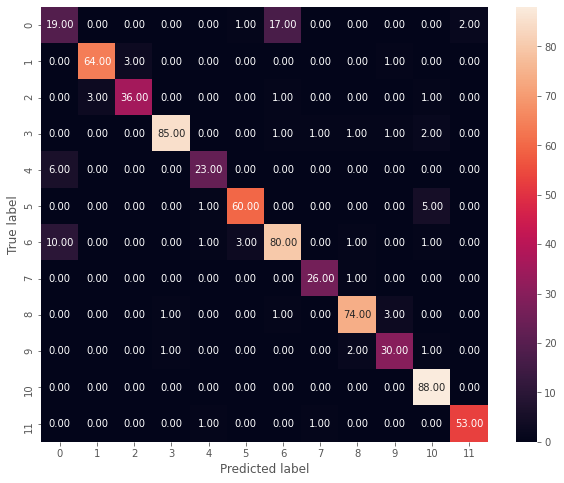

In [42]:
#confusion matrix function definition
def draw_cm( actual, predicted ):
    fig = plt.figure(figsize=(10., 8.))
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f' )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
draw_cm(y_true_labels, y_pred_labels)

Analysis based on Confusion Matrix

1.   Overall accuracy seems to be good. It seems label a lot of label 6 images were predicted as label 0. 
2.   Also some images of label 0 were also predicted as label 6. Those 2 classes need to be looked at. In the grand scheme of things overall accuracy is still coming out as good. 



True Label: Scentless Mayweed
Predicted Label: Scentless Mayweed


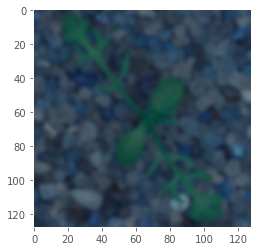

In [43]:

print("True Label:", y_true_labels[2])
print("Predicted Label:", y_true_labels[2])
plt.imshow(x_test2[2])
plt.grid(None)

True Label: Common Chickweed
Predicted Label: Common Chickweed


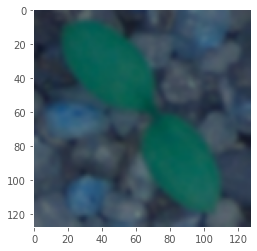

In [44]:
print("True Label:", y_true_labels[3])
print("Predicted Label:", y_pred_labels[3])
plt.imshow(x_test2[3])
plt.grid(None)

True Label: Charlock
Predicted Label: Charlock


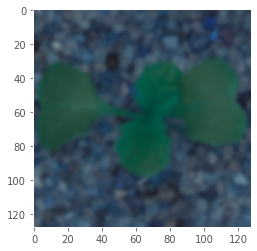

In [45]:
print("True Label:", y_true_labels[33])
print("Predicted Label:", y_pred_labels[33])
plt.imshow(x_test2[33])
plt.grid(None)

True Label: Small-flowered Cranesbill
Predicted Label: Small-flowered Cranesbill


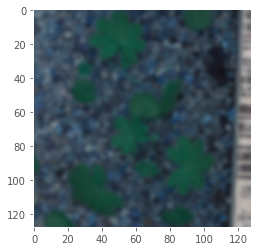

In [46]:
print("True Label:", y_true_labels[36])
print("Predicted Label:", y_pred_labels[36])
plt.imshow(x_test2[36])
plt.grid(None)

True Label: Cleavers
Predicted Label: Cleavers


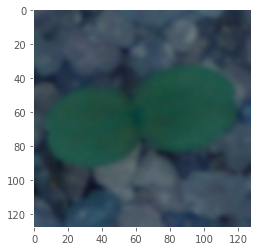

In [47]:
print("True Label:", y_true_labels[59])
print("Predicted Label:", y_pred_labels[59])
plt.imshow(x_test2[59])
plt.grid(None)

### Conclusion
Model was able to predict the weeds with a good accuracy